In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('../input/winemag-data_first150k.csv')
X = dataset.iloc[:, 2].values
y = dataset.iloc[:, 4].values
# Printing out the first 5 values of the array
%matplotlib inline
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re

lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
prog = re.compile(r'[^a-zA-Z0-9]')
filtered = []

for i in range(len(X)):
    tokenized_sentence = word_tokenize(X[i])
    filtered_sentence = []
    for w in tokenized_sentence:
        w = w.lower()
        w = lem.lemmatize(w, "v")
        if not prog.match(w):
            if w not in stop_words:
                filtered_sentence.append(w)
    filtered.append(filtered_sentence)

print(filtered[:5])

[['tremendous', '100', 'varietal', 'wine', 'hail', 'oakville', 'age', 'three', 'years', 'oak', 'juicy', 'red-cherry', 'fruit', 'compel', 'hint', 'caramel', 'greet', 'palate', 'frame', 'elegant', 'fine', 'tannins', 'subtle', 'minty', 'tone', 'background', 'balance', 'reward', 'start', 'finish', 'years', 'ahead', 'develop', 'nuance', 'enjoy', '2022–2030'], ['ripe', 'aromas', 'fig', 'blackberry', 'cassis', 'soften', 'sweeten', 'slather', 'oaky', 'chocolate', 'vanilla', 'full', 'layer', 'intense', 'cushion', 'palate', 'rich', 'flavor', 'chocolaty', 'black', 'fruit', 'bake', 'spice', 'toasty', 'everlasting', 'finish', 'heady', 'ideally', 'balance', 'drink', '2023'], ['mac', 'watson', 'honor', 'memory', 'wine', 'make', 'mother', 'tremendously', 'delicious', 'balance', 'complex', 'botrytised', 'white', 'dark', 'gold', 'color', 'layer', 'toast', 'hazelnut', 'pear', 'compote', 'orange', 'peel', 'flavor', 'revel', 'succulence', '122', 'g/l', 'residual', 'sugar'], ['spend', '20', 'months', '30', 

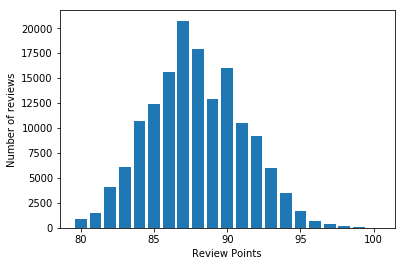

In [3]:
Review_count = dataset.groupby('points').count()
plt.bar(Review_count.index.values, Review_count['description'])
plt.xlabel('Review Points')
plt.ylabel('Number of reviews')
plt.show()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(X)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error  
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MultinomialNB Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

MultinomialNB Accuracy:  0.31286026634863845
Mean Squared Error:  4.426246162680271


## TD-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(X)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error  
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("MultinomialNB Accuracy: ", accuracy_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

MultinomialNB Accuracy:  0.22679387795666867
Mean Squared Error:  6.449016100178891
